In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

[  0.   5.  10.  15.  20.  25.  30.]


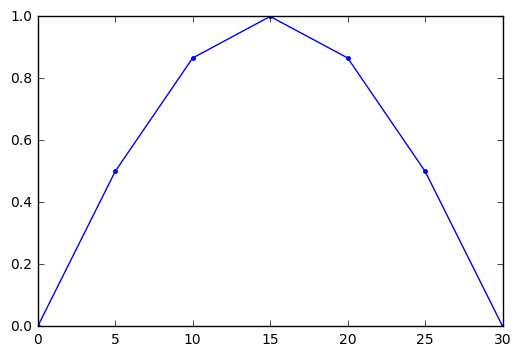

In [2]:
# define test data
x = np.arange(0, 31, 5.)
print(x)
f = np.sin(np.pi* x/ x.max())
plt.plot(x, f, '.-')

In [3]:
# put into xarray dataarray
# http://xarray.pydata.org/en/stable/data-structures.html
da = xr.DataArray(f, dims=['x'], coords={'x': x}, name='f')
da

<xarray.DataArray 'f' (x: 7)>
array([  0.00000000e+00,   5.00000000e-01,   8.66025404e-01,
         1.00000000e+00,   8.66025404e-01,   5.00000000e-01,
         5.66553890e-16])
Coordinates:
  * x        (x) float64 0.0 5.0 10.0 15.0 20.0 25.0 30.0

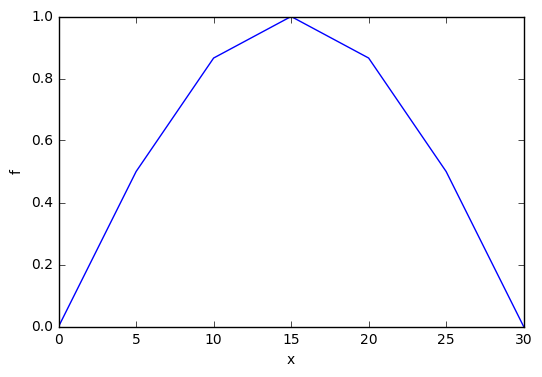

In [4]:
da.plot()

In [5]:
x_test = 11.

In [6]:
idx = da.indexes['x'] # get the of the dimensional x
print(idx)
print(type(idx)) # so the underline dataset index is pandas indexes

Float64Index([0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0], dtype='float64', name='x')
<class 'pandas.indexes.numeric.Float64Index'>


In [15]:
# check the location of pandas.index 
# we find the function get_loc
i_nearest = idx.get_loc(x_test, method='nearest') 
print('i_nearest', i_nearest) # we are working on the index now


# find the nearest value 
# recall that x is the dimension variable, return a dataset coordinate object
# value returns the value of the coordinates
x_nearest = da.x[i_nearest].values 
print('x_nearest', x_nearest)


delta_x = x_test - x_nearest
print('delta_x', delta_x)

if delta_x > 0:  # the nearest index is on the left
    i_next = i_nearest + 1  # increase the location of the index( or coordinate)
else:            # the nearest index is on the right
    i_next = i_nearest - 1
    
# find the next coordinate value    
x_next = da.x[i_next].values
print('x_next', x_next)


### Lagrangian Interpolation
# prepare for the Lagrangian interpolation
w = delta_x / (x_next - x_nearest)  
print('w', w)


# they are the same
#da[x==x_nearest].values  # there is an issue, beacause many item may share the same values in coordinate x
#da.isel(x=i_nearest).values

# https://xray.readthedocs.io/en/stable/indexing.html
print('da.isel(x=i_next).values', da.isel(x=i_next).values)
print('da.isel(x=i_nearest).values',da.isel(x=i_nearest).values)


# the interpolation value
f_interp = (1-w)*da.isel(x=i_nearest).values + w*da.isel(x=i_next).values
print('the interpolation value is:', f_interp)

# transfer the value into a DataArray
da_interp = xr.DataArray([f_interp], dims=['x'], coords={'x': x_test}) # datarray is always taking a list
print('----------------------')
print('da_interp', da_interp )

# validation: (we can further reduce the stepsize at the beginning of the experiment) 
print('for a comparison, the exact value is', np.sin(np.pi* x_test/ x.max()))

i_nearest 2
x_nearest 10.0
delta_x 1.0
x_next 15.0
w 0.2
da.isel(x=i_next).values 1.0
da.isel(x=i_nearest).values 0.8660254037844386
the interpolation value is: 0.892820323028
----------------------
da_interp <xarray.DataArray (x: 1)>
array([ 0.89282032])
Coordinates:
    x        float64 11.0
for a comparison, the exact value is 0.913545457643


In [16]:
?da.x

In [36]:
x_test = 11.
idx = da.indexes['x']
i_nearest = idx.get_loc(x_test, method='nearest') # check the location of the x_test
x_nearest = da.x[i_nearest].values
delta_x = x_test - x_nearest
if delta_x > 0:
    i_next = i_nearest + 1
else:
    i_next = i_nearest - 1

x_next = da.x[i_next].values
w = delta_x / (x_next - x_nearest)


f_interp = (1-w)*da.isel(x=i_nearest).values + w*da.isel(x=i_next).values
print(f_interp) # this is just a value, need to make it into a dataarray
da_interp = xr.DataArray([f_interp], dims=['x'], coords={'x': x_test})
da_interp

0.892820323028


<xarray.DataArray (x: 1)>
array([ 0.89282032])
Coordinates:
    x        float64 11.0

In [38]:
f_interp

0.89282032302755088

In [39]:
idx

Float64Index([0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0], dtype='float64', name='x')

In [40]:
type(idx)

pandas.indexes.numeric.Float64Index

In [41]:
# there might be a better way to use the underlying index object
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.html
# for now, let's just code something that works

2

In [ ]:
delta_x = x_test - f_nearest.x.values
delta_x

In [ ]:
f_nearest.x.values + delta_x